# Song popularity prediction

### Phase 1: Business Understanding

Het doel van dit model is om te testen of populariteit van een nummer 
<br>
voorspelt kan worden met lineaire regressie o.b.v de audio-features 
<br>
in deze dataset. 

### Phase 2: Data Understanding 

In [34]:
# Modules importeren
import pandas as pd
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
import seaborn as sns 
import numpy as np
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.compose import ColumnTransformer

# Dataset importeren 
df = pd.read_csv("/Users/odessa/Desktop/Applied Data Science & AI/Data Science/Code Inleiding data science/song_data.csv")

# Target variabele maken 
target = 'song_popularity'
#df.drop(columns=["song_name"], inplace=True) # inplace=True veranderd de originele dataframe zonder nieuwe dataframe te maken 

In [35]:
# Eerste 5 rijen van de dataframe printen
display(df.head())
# Er zijn in totaal 16 kolommen in deze dataframe

,song_name,song_popularity,song_duration_ms,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,audio_mode,speechiness,tempo,time_signature,audio_valence
0,Boulevard of Broken Dreams,73,262333,0.005520,0.496,0.682,0.000029,8,0.0589,-4.095,1,0.0294,167.060,4,0.474
1,In The End,66,216933,0.010300,0.542,0.853,0.000000,3,0.1080,-6.407,0,0.0498,105.256,4,0.370
2,Seven Nation Army,76,231733,0.008170,0.737,0.463,0.447000,0,0.2550,-7.828,1,0.0792,123.881,4,0.324
3,By The Way,74,216933,0.026400,0.451,0.970,0.003550,0,0.1020,-4.938,1,0.1070,122.444,4,0.198
4,How You Remind Me,56,223826,0.000954,0.447,0.766,0.000000,10,0.1130,-5.065,1,0.0313,172.011,4,0.574


In [36]:
# Datatypes printen en checken of er nullwaardes zijn 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18835 entries, 0 to 18834
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   song_name         18835 non-null  object 
 1   song_popularity   18835 non-null  int64  
 2   song_duration_ms  18835 non-null  int64  
 3   acousticness      18835 non-null  float64
 4   danceability      18835 non-null  float64
 5   energy            18835 non-null  float64
 6   instrumentalness  18835 non-null  float64
 7   key               18835 non-null  int64  
 8   liveness          18835 non-null  float64
 9   loudness          18835 non-null  float64
 10  audio_mode        18835 non-null  int64  
 11  speechiness       18835 non-null  float64
 12  tempo             18835 non-null  float64
 13  time_signature    18835 non-null  int64  
 14  audio_valence     18835 non-null  float64
dtypes: float64(9), int64(5), object(1)
memory usage: 2.2+ MB


In [37]:
# Statistiche informatie weergeven 
df.describe().T

# Opvallend: 
# Time_signature van 0 
# Loudness heeft normaliter een waarde tussen -60 en 0 dB 
# Tempo heeft een minimum van 0

# danceability minimum = 0 checken ?
# speechiness minimum = 0 checken ?

# Deze punten worden aangepakt bij fase 3 

,count,mean,std,min,25%,50%,75%,max
song_popularity,18835.0,52.991877,21.905654,0.000000,40.0000,56.000000,69.00000,100.000
song_duration_ms,18835.0,218211.587576,59887.540566,12000.000000,184339.5000,211306.000000,242844.00000,1799346.000
acousticness,18835.0,0.258539,0.288719,0.000001,0.0241,0.132000,0.42400,0.996
danceability,18835.0,0.633348,0.156723,0.000000,0.5330,0.645000,0.74800,0.987
energy,18835.0,0.644995,0.214101,0.001070,0.5100,0.674000,0.81500,0.999
instrumentalness,18835.0,0.078008,0.221591,0.000000,0.0000,0.000011,0.00257,0.997
key,18835.0,5.289196,3.614595,0.000000,2.0000,5.000000,8.00000,11.000
liveness,18835.0,0.179650,0.143984,0.010900,0.0929,0.122000,0.22100,0.986
loudness,18835.0,-7.447435,3.827831,-38.768000,-9.0440,-6.555000,-4.90800,1.585
audio_mode,18835.0,0.628139,0.483314,0.000000,0.0000,1.000000,1.00000,1.000


In [38]:
# Hoeveel waardes zitten in de dataframe? 
print(f"Totaal aantal waardes in de dataframe: {len(df)}")

# Hoeveel unieke rijen in elke kolom? 
df.nunique().sort_values(ascending=False)

Totaal aantal waardes in de dataframe: 18835


song_name           13070
tempo               12112
song_duration_ms    11771
loudness             8416
instrumentalness     3925
acousticness         3209
liveness             1425
audio_valence        1246
speechiness          1224
energy               1132
danceability          849
song_popularity       101
key                    12
time_signature          5
audio_mode              2
dtype: int64

### Grafieken plotten 

<function matplotlib.pyplot.show(close=None, block=None)>

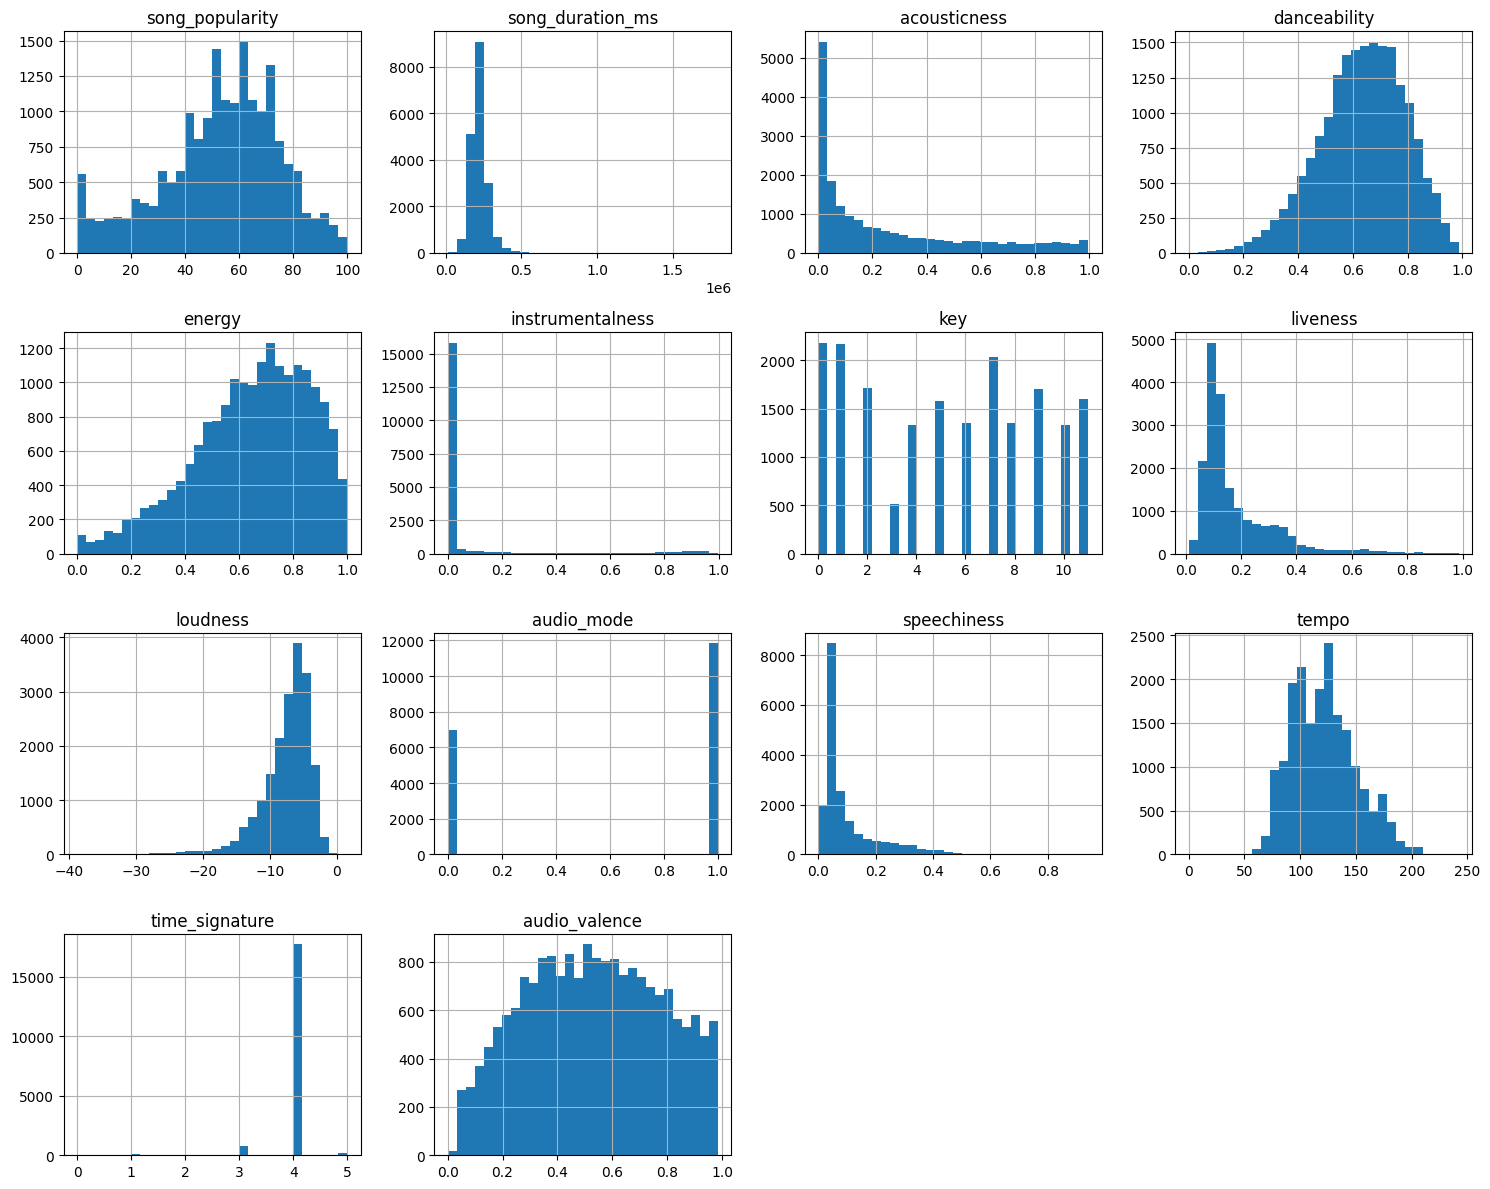

In [39]:
# Matplotlib histogrammen plotten 
df.hist(figsize=(15,12), bins=30)
plt.tight_layout()
plt.show

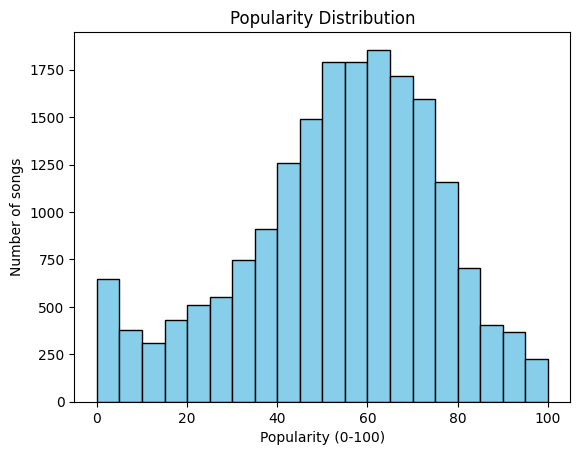

In [40]:
# Plot popularity distribution
plt.hist(df["song_popularity"], bins=20, color="skyblue", edgecolor="black")
plt.title("Popularity Distribution")
plt.xlabel("Popularity (0-100)")
plt.ylabel("Number of songs")
plt.show()

### Correlaties


0.00 – 0.30	nauwelijks of geen correlatie
<br>
0.30 – 0.50	lage of zwakke correlatie
<br>
0.50 – 0.70	middelmatige correlatie
<br>
0.70 – 0.90	hoge of sterke correlatie
<br>
0.90 – 1.00	zeer hoge of zeer sterke correlatie

In [41]:
df_num = df.select_dtypes(include=['number']).copy()
corr_matrix = df_num.corr()
print(corr_matrix['song_popularity'].sort_values(ascending=True))

instrumentalness   -0.130907
acousticness       -0.065181
audio_valence      -0.052895
liveness           -0.038937
tempo              -0.022672
song_duration_ms   -0.018899
key                -0.013160
audio_mode         -0.004969
energy              0.001365
speechiness         0.021479
time_signature      0.034983
loudness            0.099442
danceability        0.104290
song_popularity     1.000000
Name: song_popularity, dtype: float64


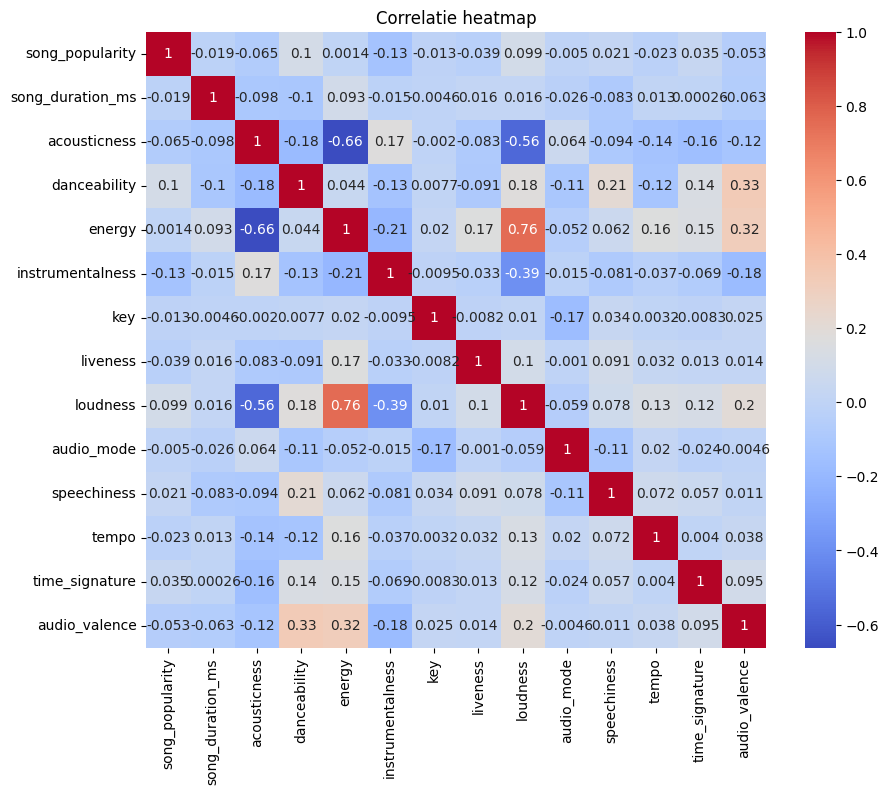

In [42]:
plt.figure(figsize = (10,8))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title("Correlatie heatmap")
plt.show()

# Loudness en energy hebben een sterke positieve correlatie: 0.77
# energy en acousticness hebben een redelijk sterke negatieve correlatie: -0.68
# loudness en acousticness hebben een negatieve correlatie: -0.57 
# loudness en instrumentallness hebben een negatieve correlatie: -0.4

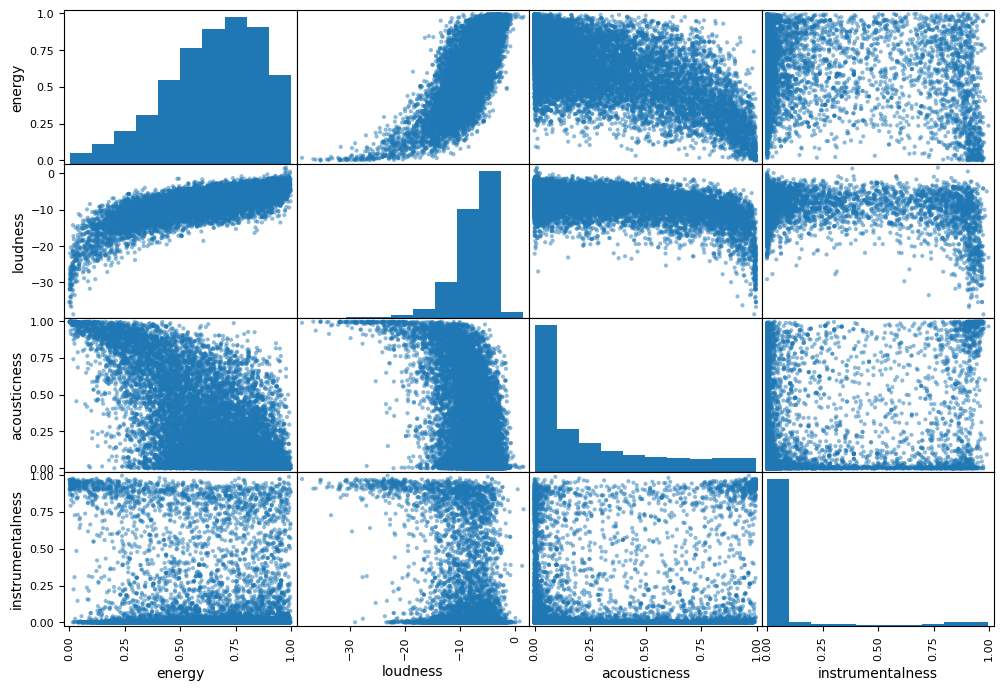

In [43]:
attributes = ["energy", "loudness", "acousticness",
"instrumentalness"]
scatter_matrix(df[attributes], figsize=(12, 8))
plt.show()

### Phase 3: Data Preparation

In [44]:
# time_signature gaat van 3 tot 7 volgens spotify api
df["time_signature"].value_counts()
# waardes van 0 en 1 kan niet 

time_signature
4    17754
3      772
5      233
1       73
0        3
Name: count, dtype: int64

In [45]:
# Indexen van time_signature == 0 
time_sig_is_zero = df[df['time_signature'] == 0]
print(time_sig_is_zero['time_signature'])

7119     0
11171    0
18120    0
Name: time_signature, dtype: int64


In [46]:
# Indexen van time_signature == 1
time_sig_is_one = df[df['time_signature'] == 1]
print(time_sig_is_one['time_signature'])

53       1
246      1
405      1
1347     1
1802     1
        ..
18409    1
18540    1
18553    1
18741    1
18787    1
Name: time_signature, Length: 73, dtype: int64


In [47]:
# Dataframe maken van time_signatures 0 en 1 
df_time_signature_0_1 = pd.concat([time_sig_is_zero, time_sig_is_one])

In [48]:
# Statistische berekeningen zien van waardes met time signatures van 0 en 1 
display(df_time_signature_0_1.describe())

,song_popularity,song_duration_ms,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,audio_mode,speechiness,tempo,time_signature,audio_valence
count,76.000000,76.000000,76.000000,76.000000,76.000000,76.000000,76.000000,76.000000,76.000000,76.000000,76.000000,76.000000,76.000000,76.000000
mean,47.381579,201639.921053,0.483354,0.476434,0.508358,0.230627,5.157895,0.173304,-9.787329,0.723684,0.133330,105.422816,0.960526,0.337376
std,21.230775,61518.832384,0.358363,0.177620,0.254828,0.368614,3.513982,0.142725,4.923199,0.450146,0.150301,36.808287,0.196013,0.231355
min,0.000000,12000.000000,0.000001,0.000000,0.003790,0.000000,0.000000,0.064000,-29.298000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,38.250000,174079.500000,0.126000,0.374250,0.303500,0.000000,2.000000,0.099125,-10.865500,0.000000,0.034500,79.569250,1.000000,0.157250
50%,52.000000,196173.000000,0.469500,0.505500,0.539000,0.001705,5.500000,0.120000,-9.009500,1.000000,0.052550,100.456500,1.000000,0.291000
75%,61.250000,225076.000000,0.813000,0.603000,0.723000,0.328500,8.000000,0.199000,-6.810250,1.000000,0.193500,119.626750,1.000000,0.488250
max,80.000000,435040.000000,0.991000,0.833000,0.992000,0.963000,11.000000,0.944000,-3.127000,1.000000,0.663000,200.729000,1.000000,0.908000


In [49]:
display(df_time_signature_0_1.sort_values(by='song_duration_ms').head(25))
#note: index 7119 verwijderen 

,song_name,song_popularity,song_duration_ms,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,audio_mode,speechiness,tempo,time_signature,audio_valence
7119,Gina Rodriguez - Latinos Trending Intro,0,12000,0.700000,0.000,0.493,0.000000,7,0.4570,-6.102,1,0.0000,0.000,0,0.0000
18064,Sparta,33,65533,0.314000,0.553,0.833,0.576000,11,0.2370,-9.427,0,0.0812,99.928,1,0.0366
11109,Circles,61,97265,0.793000,0.492,0.336,0.910000,0,0.1040,-11.989,0,0.2030,75.278,1,0.1580
11171,Aura,50,102536,0.077400,0.000,0.560,0.963000,11,0.5890,-9.866,1,0.0000,0.000,0,0.0000
11155,Noairleft,51,110769,0.798000,0.604,0.291,0.889000,0,0.1440,-13.967,1,0.3920,78.066,1,0.1110
4415,Lost,57,121338,0.130000,0.694,0.335,0.898000,2,0.3270,-6.355,0,0.0531,142.466,1,0.6630
5940,Cosmic Cave,48,123578,0.942000,0.138,0.212,0.887000,5,0.1700,-20.923,0,0.0305,81.677,1,0.4050
14376,Super!,28,124235,0.206000,0.594,0.493,0.745000,4,0.1190,-9.432,1,0.2950,75.285,1,0.5530
5875,Could This Be Magic,39,138213,0.718000,0.345,0.304,0.000000,1,0.0869,-9.744,1,0.0296,109.892,1,0.5530
14509,Coração Vagabundo,7,143426,0.785000,0.577,0.312,0.097600,0,0.1380,-13.453,0,0.0448,80.698,1,0.3720


In [50]:
display(df_time_signature_0_1.sort_values(by='danceability').head(25))
# note: index 11171 verwijderen want speechiness, danceability en tempo = 0, 

,song_name,song_popularity,song_duration_ms,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,audio_mode,speechiness,tempo,time_signature,audio_valence
7119,Gina Rodriguez - Latinos Trending Intro,0,12000,0.700000,0.000,0.49300,0.000000,7,0.4570,-6.102,1,0.0000,0.000,0,0.0000
11171,Aura,50,102536,0.077400,0.000,0.56000,0.963000,11,0.5890,-9.866,1,0.0000,0.000,0,0.0000
5940,Cosmic Cave,48,123578,0.942000,0.138,0.21200,0.887000,5,0.1700,-20.923,0,0.0305,81.677,1,0.4050
15283,I Think You're Really Beautiful,47,149327,0.913000,0.174,0.56900,0.924000,2,0.6420,-6.422,1,0.0387,86.557,1,0.2230
4817,Hypnotize,53,177462,0.002820,0.197,0.27800,0.938000,2,0.0999,-18.640,1,0.0520,73.710,1,0.0338
4803,A Drop In The Ocean,52,293647,0.463000,0.199,0.11900,0.894000,0,0.2370,-21.529,1,0.0388,110.848,1,0.0630
14950,Woman,22,176306,0.000051,0.219,0.95200,0.098900,2,0.1570,-3.621,1,0.1760,112.886,1,0.1720
53,Woman,63,176306,0.000051,0.219,0.95200,0.098900,2,0.1570,-3.621,1,0.1760,112.886,1,0.1720
16842,Clockworks,0,435040,0.000002,0.228,0.98000,0.833000,1,0.2890,-5.313,1,0.1100,129.939,1,0.3640
13337,The Watchtower,74,205577,0.991000,0.248,0.02740,0.922000,7,0.1530,-28.768,0,0.0333,75.124,1,0.1590


In [51]:
# 2 nummers droppen
df = df.drop([7119, 11171]).reset_index(drop=True)

In [52]:
# Nummers met een decibelvolume boven 0. 
luidste_nummers = df.loc[df['loudness'] > 0, ['song_name', 'loudness', 'song_popularity']]
print(luidste_nummers)

# 7 waardes. 

                                       song_name  loudness  song_popularity
2503            We Are Your Friends - Radio Edit     1.585               57
2819           Search and Destroy - Iggy Pop Mix     0.878               55
6219                                       Polar     0.525               55
7979                    Gladiator - Instrumental     0.119               14
8949                          Wake Up (RIOT VIP)     0.052               52
13004    We Are Your Friends - Justice Vs Simian     1.342               58
15621  Long Story Short - Bodybangers Remix Edit     0.198               33


In [53]:
# Tempo waardes sorteren van laag naar hoog 
df = df.sort_values('tempo')

# Nummers met een tempo van 0. 
nul_tempo = df.loc[df['tempo'] == 0, ['song_name', 'tempo', 'song_popularity']]
print(f'Nummers met een tempo van 0: {nul_tempo}')

# Tempo == 0 is opgelost na verwijderen nummers 9499 en 6415

Nummers met een tempo van 0: Empty DataFrame
Columns: [song_name, tempo, song_popularity]
Index: []


In [54]:
# Bij song_name veel dubbele waardes 
totaal_song_name = df['song_name'].count()
unieke_song_name = df['song_name'].nunique()
dubbel_song_name = totaal_song_name - unieke_song_name

print(f"song_name heeft {dubbel_song_name} dubbele waardes")

song_name heeft 5765 dubbele waardes


In [55]:
print(len(df))
# Dubbele waardes droppen van song_name en song_duration 
# Als ik alleen song_name duplicates zou verwijderen, zou ik misschien covers van nummers verwijderen, dus daarom check ik ook de song_duration 
df.drop_duplicates(subset=['song_name', 'song_duration_ms'], inplace = True)
print(f"Totaal aantal waardes in de dataframe na verwijderen van dubbele waardes uit song_name en song_duration_ms: {len(df)}")

18833
Totaal aantal waardes in de dataframe na verwijderen van dubbele waardes uit song_name en song_duration_ms: 14466


In [56]:
df['instrumentalness'].value_counts()

instrumentalness
0.000000    5055
0.001050      13
0.000001      13
0.000149      12
0.001030      12
            ... 
0.014400       1
0.000007       1
0.016200       1
0.000077       1
0.004200       1
Name: count, Length: 3902, dtype: int64

In [57]:
df.drop(columns=["song_name"], inplace=True) # inplace=True veranderd de originele dataframe zonder nieuwe dataframe te maken 

In [ ]:
# class maken en daarna in pipeline zetten 
def ikr_grenzen_berekenen(df: pd.DataFrame, kolommen=None):
    """
    Berekent voor elke numerieke kolom de onder- en bovengrens 
    op basis van interkwartielafstand (IKR).
    """
    if kolommen is None: 
        kolommen = df.select_dtypes(include=['int64', 'float64']).columns
    
    grenzen = {}

    for kolom in kolommen: 
        Q1 = df[kolom].quantile(0.25)
        Q3 = df[kolom].quantile(0.75)
        IKR = Q3 - Q1 
        ondergrens = Q1 - 1.5 * IKR
        bovengrens = Q3 + 1.5 * IKR
        grenzen[kolom] = (ondergrens, bovengrens)

    return grenzen 


def uitschieters_detecteren(df: pd.DataFrame, grenzen: dict):
    """
    Geeft een overzicht van het aantal uitschieters en percentage uitschieters per kolom.
    """
    overzicht = []
    totaal_rijen = len(df)

    for kolom, (ondergrens, bovengrens) in grenzen.items():
        voorwaarde = (df[kolom] < ondergrens) | (df[kolom] > bovengrens)
        aantal = voorwaarde.sum()
        overzicht.append({
            'kolom': kolom,
            'aantal_uitschieters': aantal,
            'percentage': round(100 * aantal / totaal_rijen, 2)
        })
    return pd.DataFrame(overzicht).sort_values('percentage', ascending = False)

def winsoriseren(df: pd.DataFrame, grenzen: dict):
    """
    Winsorisatie functie: waarden buiten de grenzen worden vervangen 
    door de dichtstbijzijnde grenswaarde.
    """
    df_gecorrigeerd = df.copy()
    for kolom, (ondergrens, bovengrens) in grenzen.items():
        df_gecorrigeerd[kolom] = df_gecorrigeerd[kolom].astype(float)
        df_gecorrigeerd.loc[df_gecorrigeerd[kolom] < ondergrens, kolom] = ondergrens
        df_gecorrigeerd.loc[df_gecorrigeerd[kolom] > bovengrens, kolom] = bovengrens
    return df_gecorrigeerd

In [59]:
# Song_popularity eerst splitsen van de rest 
x = df.drop(columns=[target])
y = df[target]

In [60]:
# Kolommen kiezen voor winsorisatie 
kolommen_winsoriseren = ['song_duration_ms', 'loudness', 'tempo', 'time_signature']
#  Grenzen berekenen 
grenzen_voor = ikr_grenzen_berekenen(x[kolommen_winsoriseren])

In [61]:
# Uitschieters detecteren 
uitschieters_voor = uitschieters_detecteren(x, grenzen_voor)
display(uitschieters_voor)

,kolom,aantal_uitschieters,percentage
3,time_signature,931,6.44
0,song_duration_ms,623,4.31
1,loudness,548,3.79
2,tempo,63,0.44


instrumentalness, speechiness, liveness, danceability, energy, acousticness, audio_valence, energy zijn scores van 0 tot 1. 
Hier niet op winsoriseren, 'uitschieters' hier zijn geen echte uitschieters. 

audio_mode is binair. Niet winsoriseren 

key = 0 tot 11 (toonsoorten). Dit is categorisch numeriek. Niet winsoriseren 

time_signature = van 3-7. Niet winsoriseren. Waardes van 0-2 zijn er al uitgehaald 
song_duration_ms. Winsoriseren 
loudness. Winsoriseren
tempo. Winsoriseren


In [62]:
# Kopie maken van x dataframe (df zonder target)
df_gecorrigeerd = x.copy()
# Winsorisatie toepassen op geselecteerde kolommen 
df_gecorrigeerd[kolommen_winsoriseren] = winsoriseren(x[kolommen_winsoriseren], grenzen_voor)

In [63]:
grenzen_na = ikr_grenzen_berekenen(df_gecorrigeerd[kolommen_winsoriseren])
uitschieters_na = uitschieters_detecteren(df_gecorrigeerd, grenzen_na)
display(uitschieters_na)

,kolom,aantal_uitschieters,percentage
0,song_duration_ms,0,0.0
1,loudness,0,0.0
2,tempo,0,0.0
3,time_signature,0,0.0


In [64]:
# target terugzetten 
df_gecorrigeerd.insert(0, target, y)
display(df_gecorrigeerd.head())

,song_popularity,song_duration_ms,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,audio_mode,speechiness,tempo,time_signature,audio_valence
18816,62,175777.00,0.0128,0.2140,0.148,0.058,7,0.1130,-16.071875,1,0.0370,46.591,4.0,0.0277
15291,46,147373.00,0.9190,0.7100,0.114,0.000,4,0.1540,-12.764000,0,0.2690,47.953,4.0,0.4330
4833,52,230000.00,0.8080,0.1460,0.126,0.949,2,0.3270,-16.071875,1,0.0400,51.607,4.0,0.0356
13248,11,272506.00,0.2750,0.5480,0.493,0.000,10,0.0634,-12.743000,1,0.1760,52.181,4.0,0.6340
5953,47,336517.75,0.6630,0.0594,0.216,0.918,8,0.0451,-16.071875,1,0.0493,54.213,4.0,0.0243


In [65]:
print(df_gecorrigeerd.select_dtypes(include=['int64', 'float64']).columns)

Index(['song_popularity', 'song_duration_ms', 'acousticness', 'danceability',
       'energy', 'instrumentalness', 'key', 'liveness', 'loudness',
       'audio_mode', 'speechiness', 'tempo', 'time_signature',
       'audio_valence'],
      dtype='object')


In [66]:
# Train en test set maken 
x = df_gecorrigeerd.drop('song_popularity', axis=1)
y = df_gecorrigeerd['song_popularity']

x_train, x_test, y_train, y_test = train_test_split(
   x, y, test_size=0.2, random_state = 42
)

### Phase 4: Modeling 

Supervised learning, omdat je de uitkomst al hebt 
<br>
Supervised learning heeft 2 hoofdtakken: regressie en classificatie 
<br>
RMSE 
<br>
Meervoudige lineare regressie 
<br>
Logistieke lineare regressie is classification 
<br>
Random forests is het begin van dat machine learning slim werd 